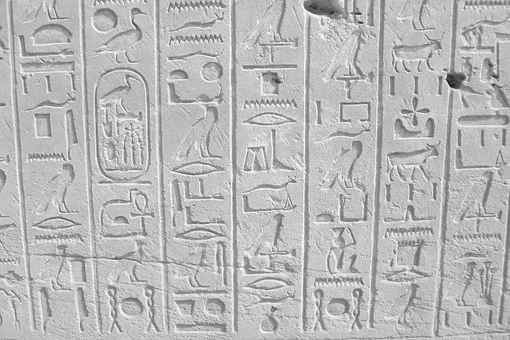

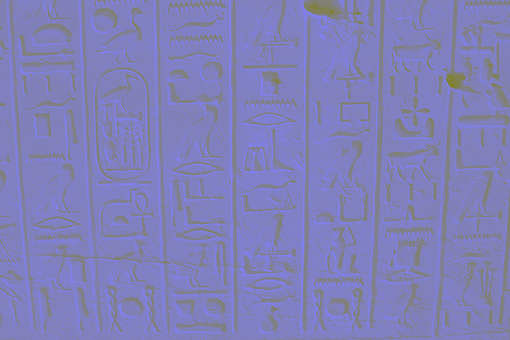

In [15]:
from __future__ import print_function
import cv2 as cv
import argparse
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

src = cv.imread("pic1.png")
cv2_imshow(src)
imgYCC = cv.cvtColor(src, cv.COLOR_BGR2YCR_CB)
cv2_imshow(imgYCC)
# src = cv.cvtColor(imgYCC, cv.COLOR_BGR2GRAY)
# dst = cv.equalizeHist(src)


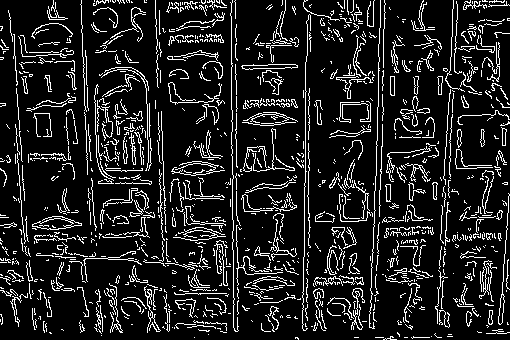

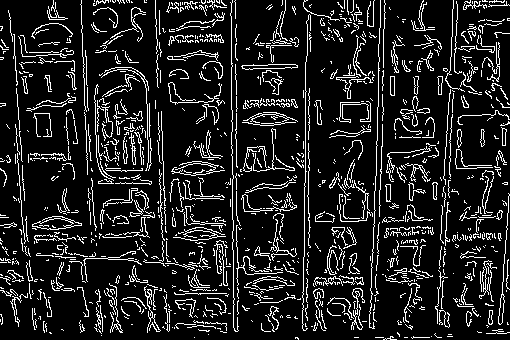

In [11]:
edges = cv.Canny(src,200,300)
edges2=cv.Canny(imgYCC,200,300)
kernel = np.ones((5,5),np.uint8)
kernel = np.ones((5,5),np.uint8)
cv2_imshow(edges)
cv2_imshow(edges2)

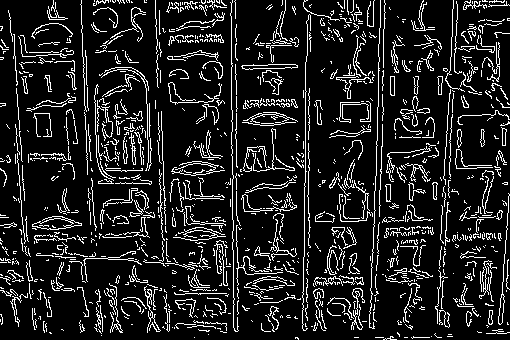

In [13]:
bitwiseAnd = cv.bitwise_and(edges, edges2)
cv2_imshow(bitwiseAnd)

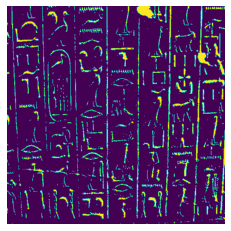

In [19]:
#using Contour Detection

sample_image = cv.imread('pic1.png')
img = cv.cvtColor(sample_image,cv.COLOR_BGR2RGB)
img = cv.resize(img,(512,512))

plt.axis('off');
plt.imshow(img)

gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
_,thresh = cv.threshold(gray, np.mean(imgYCC), 255, cv.THRESH_BINARY_INV)

plt.axis('off')
plt.imshow(thresh)

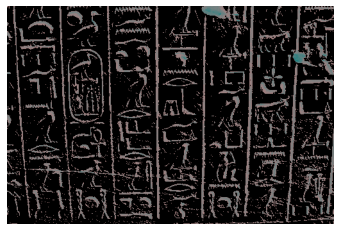

In [26]:
from skimage.filters import threshold_otsu

#using Otsu Thresholding

sample_image = cv.imread('pic1.png')
img = cv.cvtColor(sample_image,cv.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img)

img_gray=cv.cvtColor(img,cv.COLOR_RGB2GRAY)

thresh = threshold_otsu(img_gray)
img_otsu  = img_gray < thresh

plt.imshow(img_otsu)

def filter_image(image, mask):

    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask

    return np.dstack([r,g,b])

filtered = filter_image(imgYCC, img_otsu)

plt.axis('off')
plt.imshow(filtered)